<a href="https://colab.research.google.com/github/115996/-KimJiHak-YBIGTA_newbie_assignment/blob/main/stat_analysis_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 시드 설정
np.random.seed(42)

# 1000명의 학생 데이터 생성
population_data = {
    'student_id': range(1, 1001),
    'grade': np.random.choice([1, 2, 3], 1000, p=[0.3, 0.4, 0.3]), # 학년 (1, 2, 3학년)
    'score': np.random.randint(50, 101, 1000), # 성적 (50 ~ 100점)
    'city': np.random.choice(['서울', '부산', '인천', '광주'], 1000, p=[0.4, 0.3, 0.2, 0.1]) # 소속 도시
}

population_df = pd.DataFrame(population_data)

print("전체 인구 데이터 (상위 5개):")
print(population_df.head())
print(f"\n전체 인구 수: {len(population_df)}")

전체 인구 데이터 (상위 5개):
   student_id  grade  score city
0           1      2     96   서울
1           2      3     61   서울
2           3      3     65   부산
3           4      2     73   광주
4           5      1     68   부산

전체 인구 수: 1000


In [ ]:
print(population_df['grade'].value_counts().sort_index())
print(population_df['city'].value_counts().sort_index())

grade
1    319
2    393
3    288
Name: count, dtype: int64
city
광주     93
부산    312
서울    390
인천    205
Name: count, dtype: int64


In [ ]:
# 100개의 표본을 단순 랜덤 추출
simple_random_sample = population_df.sample(n=100, random_state=42)

print("단순 랜덤 추출 결과 (상위 5개):")
print(simple_random_sample.head())
print(f"\n추출된 표본 수: {len(simple_random_sample)}")

# 추출된 표본의 학년 분포 확인
print("\n표본의 학년 분포:")
print(simple_random_sample['grade'].value_counts())

단순 랜덤 추출 결과 (상위 5개):
     student_id  grade  score city
521         522      2     68   인천
737         738      3     65   부산
740         741      2     54   인천
660         661      2     99   부산
411         412      3     85   부산

추출된 표본 수: 100

표본의 학년 분포:
grade
2    44
1    32
3    24
Name: count, dtype: int64


In [ ]:
# 표본 크기 및 모집단 크기 설정
sample_size = 100
population_size = len(population_df)

# 추출 간격 계산
k = population_size // sample_size
print(f"추출 간격(k): {k}")

# 첫 번째 표본의 인덱스를 무작위로 선택 (0부터 k-1 사이)
start_index = np.random.randint(0, k)
print(f"시작 인덱스: {start_index}")

# 계통 추출을 위한 인덱스 생성
systematic_indices = np.arange(start_index, population_size, step=k)

# 인덱스를 사용하여 표본 추출
systematic_sample = population_df.iloc[systematic_indices]

print("\n계통 추출 결과 (상위 5개):")
print(systematic_sample.head())
print(f"\n추출된 표본 수: {len(systematic_sample)}")

추출 간격(k): 10
시작 인덱스: 8

계통 추출 결과 (상위 5개):
    student_id  grade  score city
8            9      2     66   서울
18          19      2     64   서울
28          29      2     66   인천
38          39      2    100   서울
48          49      2     84   부산

추출된 표본 수: 100


In [ ]:
from sklearn.model_selection import train_test_split

# 여기서는 train_test_split 함수를 층화 추출 목적으로 활용합니다.
# test_size를 원하는 표본 비율로 설정하고, stratify에 기준 열을 지정합니다.
# 예를 들어, 100개를 뽑고 싶다면 100/1000 = 0.1 이므로 test_size=0.1로 설정합니다.

_, stratified_sample = train_test_split(
    population_df,
    test_size=0.1, # 전체의 10% (100개)를 표본으로 추출
    stratify=population_df['grade'], # 'grade' 열의 비율을 유지하며 추출
    random_state=42
)

print("층화 추출 결과 (상위 5개):")
print(stratified_sample.head())
print(f"\n추출된 표본 수: {len(stratified_sample)}")

# 모집단과 표본의 학년 비율 비교
print("\n모집단의 학년 비율:")
print(population_df['grade'].value_counts(normalize=True).sort_index())

print("\n층화 추출 표본의 학년 비율:")
print(stratified_sample['grade'].value_counts(normalize=True).sort_index())

층화 추출 결과 (상위 5개):
     student_id  grade  score city
323         324      1     56   서울
457         458      2     99   인천
620         621      1     85   인천
149         150      1     92   서울
75           76      3     67   부산

추출된 표본 수: 100

모집단의 학년 비율:
grade
1    0.319
2    0.393
3    0.288
Name: proportion, dtype: float64

층화 추출 표본의 학년 비율:
grade
1    0.32
2    0.39
3    0.29
Name: proportion, dtype: float64


In [ ]:
# 집락으로 사용할 'city' 목록 확인
clusters = population_df['city'].unique()
print(f"전체 집락 (도시): {clusters}")

# 2개의 집락을 무작위로 선택
num_clusters_to_select = 2
selected_clusters = np.random.choice(clusters, size=num_clusters_to_select, replace=False)
print(f"선택된 집락: {selected_clusters}")

# 선택된 집락에 속하는 모든 데이터를 표본으로 추출
cluster_sample = population_df[population_df['city'].isin(selected_clusters)]

print("\n집락 추출 결과 (상위 5개):")
print(cluster_sample.head())
print(f"\n추출된 표본 수: {len(cluster_sample)}")
print("\n추출된 표본의 도시 구성:")
print(cluster_sample['city'].value_counts())

전체 집락 (도시): ['서울' '부산' '광주' '인천']
선택된 집락: ['광주' '부산']

집락 추출 결과 (상위 5개):
   student_id  grade  score city
2           3      3     65   부산
3           4      2     73   광주
4           5      1     68   부산
5           6      1     57   부산
7           8      3     70   부산

추출된 표본 수: 405

추출된 표본의 도시 구성:
city
부산    312
광주     93
Name: count, dtype: int64


1. 단일표본 t-검정 (One-Sample t-test)
개념: 하나의 집단의 평균이 **특정 값(알려진 평균)**과 같은지 다른지를 검정합니다. 예를 들어 "우리 반 학생들의 평균 키는 전국 평균인 170cm와 차이가 있는가?"를 확인할 때 사용합니다.

상황 예시: A 과자 회사는 자사 제품의 평균 중량이 150g이라고 주장합니다. 이를 확인하기 위해 30개의 과자 샘플을 뽑아 무게를 측정했습니다. 이 샘플의 평균 중량이 150g과 통계적으로 유의미한 차이가 있는지 검정해 보겠습니다.

귀무가설 (H_0): 샘플의 평균 중량은 150g과 같다. (mu=150)

대립가설 (H_1): 샘플의 평균 중량은 150g과 다르다. (mu!=150)

In [ ]:
import numpy as np
from scipy import stats

#  설정
np.random.seed(42)

In [ ]:
# 1. 데이터 생성
# A 회사의 주장(모평균)
claimed_mean = 150
# 30개 샘플을 뽑았다고 가정, 실제 평균은 149.5g, 표준편차 5로 정규분포를 따름
sample_data = np.random.normal(loc=149.5, scale=5, size=30)

print(f"샘플 데이터의 평균: {sample_data.mean():.2f}g")

# 2. 단일표본 t-검정 수행
# ttest_1samp(데이터, 검정하려는 모평균)
t_statistic, p_value = stats.ttest_1samp(sample_data, popmean=claimed_mean)

print(f"\nt-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 3. 결과 해석
alpha = 0.05  # 유의수준 5%
if p_value < alpha:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 작으므로 귀무가설을 기각합니다.")
    print("-> 과자 중량은 150g과 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 크므로 귀무가설을 기각할 수 없습니다.")
    print("-> 과자 중량이 150g과 차이가 있다는 충분한 근거를 찾지 못했습니다.")

샘플 데이터의 평균: 148.56g

t-통계량: -1.7536
p-값: 0.0901

결론: p-값(0.0901)이 유의수준(0.05)보다 크므로 귀무가설을 기각할 수 없습니다.
-> 과자 중량이 150g과 차이가 있다는 충분한 근거를 찾지 못했습니다.


2. 독립표본 t-검정 (Independent Samples t-test)
개념: 서로 다른 두 집단의 평균에 차이가 있는지 검정합니다. 예를 들어 "A반과 B반의 수학 점수 평균은 다른가?"를 확인할 때 사용합니다. (두 집단은 서로 독립적이어야 합니다.)

상황 예시: 웹사이트의 A/B 테스트를 진행했습니다. 기존 디자인(A그룹)과 새로운 디자인(B그룹)을 사용자에게 보여주고, 각 그룹의 평균 페이지 체류 시간을 비교하여 새로운 디자인이 효과가 있는지 검정합니다.

귀무가설 (H_0): A그룹과 B그룹의 평균 체류 시간은 같다. (mu_A=mu_B)

대립가설 (H_1): A그룹과 B그룹의 평균 체류 시간은 다르다. (mu_A!=mu_B)

In [ ]:
# 1. 데이터 생성
# A그룹(기존 디자인) 사용자의 체류 시간 (50명)
group_a_time = np.random.normal(loc=180, scale=20, size=50) # 평균 180초
# B그룹(새로운 디자인) 사용자의 체류 시간 (55명)
group_b_time = np.random.normal(loc=195, scale=22, size=55) # 평균 195초

print(f"A그룹 평균 체류 시간: {group_a_time.mean():.2f}초")
print(f"B그룹 평균 체류 시간: {group_b_time.mean():.2f}초")

# 2. 독립표본 t-검정 수행
# ttest_ind(데이터1, 데이터2, equal_var=False)
# equal_var=False는 두 그룹의 분산이 다르다고 가정하는 Welch's t-test를 수행 (더 일반적이고 안전함)
t_statistic, p_value = stats.ttest_ind(group_a_time, group_b_time, equal_var=False)

print(f"\nt-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 3. 결과 해석
alpha = 0.05
if p_value < alpha:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 작으므로 귀무가설을 기각합니다.")
    print("-> 두 웹사이트 디자인 간 평균 체류 시간에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 크므로 귀무가설을 기각할 수 없습니다.")
    print("-> 두 디자인 간 평균 체류 시간 차이에 대한 충분한 근거를 찾지 못했습니다.")

A그룹 평균 체류 시간: 178.29초
B그룹 평균 체류 시간: 194.25초

t-통계량: -4.0658
p-값: 0.0001

결론: p-값(0.0001)이 유의수준(0.05)보다 작으므로 귀무가설을 기각합니다.
-> 두 웹사이트 디자인 간 평균 체류 시간에는 통계적으로 유의미한 차이가 있습니다.


3. 대응표본 t-검정 (Paired Samples t-test)
개념: 동일한 집단에 대해 어떤 처치(intervention)를 가했을 때, 전후(before/after) 값의 평균에 차이가 있는지 검정합니다. 예를 들어 "특정 약을 복용하기 전과 후의 혈압 평균은 다른가?"를 확인할 때 사용합니다.

상황 예시: 다이어트 약의 효과를 검증하기 위해 25명의 참가자를 대상으로 약 복용 전과 복용 후의 체중을 측정했습니다. 약이 실제로 체중 감량에 효과가 있었는지 검정합니다.

귀무가설 (H_0): 복용 전후의 체중 변화량 평균은 0이다. (mu_after−mu_before=0)

대립가설 (H_1): 복용 전후의 체중 변화량 평균은 0이 아니다. (mu_after−mu_before
!=0)

In [ ]:
# 1. 데이터 생성
# 복용 전 체중 데이터 (25명)
weight_before = np.random.normal(loc=75, scale=8, size=25)
# 복용 후 체중 데이터 (평균적으로 2kg 감량했다고 가정)
# 복용 전 데이터에서 약간의 변화를 주어 '대응' 관계를 표현
weight_after = weight_before - np.random.normal(loc=2, scale=3, size=25)

print(f"복용 전 평균 체중: {weight_before.mean():.2f}kg")
print(f"복용 후 평균 체중: {weight_after.mean():.2f}kg")

# 2. 대응표본 t-검정 수행
# ttest_rel(데이터_전, 데이터_후)
t_statistic, p_value = stats.ttest_rel(weight_before, weight_after)

print(f"\nt-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 3. 결과 해석
alpha = 0.05
if p_value < alpha:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 작으므로 귀무가설을 기각합니다.")
    print("-> 다이어트 약 복용 전후에 통계적으로 유의미한 체중 변화가 있었습니다.")
else:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 크므로 귀무가설을 기각할 수 없습니다.")
    print("-> 약 복용 전후의 체중 변화에 대한 충분한 근거를 찾지 못했습니다.")

복용 전 평균 체중: 75.31kg
복용 후 평균 체중: 72.62kg

t-통계량: 4.6152
p-값: 0.0001

결론: p-값(0.0001)이 유의수준(0.05)보다 작으므로 귀무가설을 기각합니다.
-> 다이어트 약 복용 전후에 통계적으로 유의미한 체중 변화가 있었습니다.


일원배치 분산분석 (One-way ANOVA)
개념: 하나의 요인(독립 변수)에 따라 세 개 이상의 집단으로 나뉘었을 때, 각 집단의 평균(종속 변수)에 유의미한 차이가 있는지를 검정합니다.

상황 예시: 세 가지 다른 교수법(A, B, C)이 학생들의 시험 점수에 미치는 영향이 다른지 알고 싶습니다. 각 교수법으로 학습한 학생들의 시험 점수 데이터를 사용해, 교수법 간에 평균 점수 차이가 있는지 검정합니다.

귀무가설 (H_0): 세 가지 교수법에 따른 학생들의 평균 점수는 모두 같다. (
mu_A=
mu_B=
mu_C)

대립가설 (H_1): 적어도 하나의 교수법은 다른 교수법과 평균 점수가 다르다. (모든 평균이 같지는 않다)

/tmp/ipython-input-3283989047.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_a, scores_b, scores_c], labels=['Method A', 'Method B', 'Method C'])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54744 (\N{HANGUL

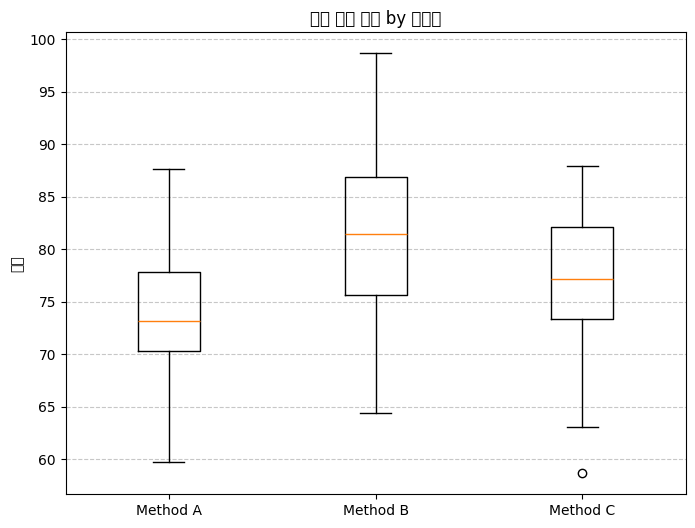

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# ------------------- 한글 폰트 설정 (이 부분을 추가) -------------------
# Windows 사용자의 경우
plt.rc('font', family='Malgun Gothic')

# Mac 사용자의 경우
# plt.rc('font', family='AppleGothic')

# 깨진 마이너스 부호 해결
plt.rc('axes', unicode_minus=False)
# --------------------------------------------------------------------

# 재현 가능한 결과를 위해 시드 설정
np.random.seed(42)

# 세 그룹(교수법 A, B, C)의 시험 점수 데이터 생성
scores_a = np.random.normal(loc=75, scale=8, size=30)
scores_b = np.random.normal(loc=82, scale=9, size=30)
scores_c = np.random.normal(loc=77, scale=7, size=30)

# 데이터 시각화 (이제 한글이 깨지지 않습니다)
plt.figure(figsize=(8, 6))
plt.boxplot([scores_a, scores_b, scores_c], labels=['Method A', 'Method B', 'Method C'])
plt.title('시험 점수 분포 by 교수법') # 한글 제목
plt.ylabel('점수') # 한글 라벨
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 2. 일원배치 분산분석 수행
# f_oneway(데이터1, 데이터2, 데이터3, ...)
f_statistic, p_value = stats.f_oneway(scores_a, scores_b, scores_c)

print(f"\nF-통계량: {f_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 3. 결과 해석
alpha = 0.05
if p_value < alpha:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 작으므로 귀무가설을 기각합니다.")
    print("-> 적어도 하나의 교수법은 다른 교수법과 평균 점수에 유의미한 차이가 있습니다.")
else:
    print(f"\n결론: p-값({p_value:.4f})이 유의수준({alpha})보다 크므로 귀무가설을 기각할 수 없습니다.")
    print("-> 세 교수법 간 평균 점수에 유의미한 차이가 있다고 말할 수 없습니다.")


F-통계량: 7.2667
p-값: 0.0012

결론: p-값(0.0012)이 유의수준(0.05)보다 작으므로 귀무가설을 기각합니다.
-> 적어도 하나의 교수법은 다른 교수법과 평균 점수에 유의미한 차이가 있습니다.


사후 분석 (Post-Hoc Analysis)
분산분석 결과, "적어도 하나는 차이가 있다"는 것을 알게 되었습니다. 하지만 정확히 어느 집단이 다른지는 알려주지 않습니다. 예를 들어, A와 B가 다른지, B와 C가 다른지 등을 알 수 없습니다.

이때, 어떤 집단 간에 차이가 있는지를 구체적으로 확인하기 위해 사후 분석을 실시합니다. 가장 널리 쓰이는 방법 중 하나는 튜키의 HSD (Tukey's Honestly Significant Difference) 검정입니다.

In [ ]:
# statsmodels 라이브러리가 없다면 설치해야 합니다.
# !pip install statsmodels

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. 데이터를 하나의 배열로 합치고, 각 데이터가 어느 그룹에 속하는지 라벨링
all_scores = np.concatenate([scores_a, scores_b, scores_c])
group_labels = ['Method A'] * len(scores_a) + ['Method B'] * len(scores_b) + ['Method C'] * len(scores_c)

# 2. 튜키 HSD 사후 분석 수행
tukey_result = pairwise_tukeyhsd(endog=all_scores, groups=group_labels, alpha=0.05)

# 3. 결과 출력 및 해석
print("\n\n** 튜키 HSD 사후 분석 결과 **")
print(tukey_result)



** 튜키 HSD 사후 분석 결과 **
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Method A Method B   7.4147 0.0007  2.7763 12.0531   True
Method A Method C   3.5954 0.1602 -1.0431  8.2338  False
Method B Method C  -3.8193 0.1275 -8.4578  0.8191  False
--------------------------------------------------------


이원배치 분산분석 (Two-way ANOVA)
개념: 두 개의 독립변수(요인)와 그 두 변수의 상호작용이 종속변수의 평균에 유의미한 차이를 만드는지 검정합니다.

상황 예시: '교수법'(A, B)과 학생의 '선수지식 수준'(상, 하)이라는 두 가지 요인이 '시험 점수'에 어떤 영향을 미치는지 분석합니다.

가설 1 (주효과: 교수법): 교수법에 따라 평균 점수에 차이가 있는가?

가설 2 (주효과: 선수지식): 선수지식 수준에 따라 평균 점수에 차이가 있는가?

가설 3 (상호작용 효과): 특정 교수법의 효과가 학생의 선수지식 수준에 따라 달라지는가? (예: A교수법은 '상' 수준 학생에게만 특히 효과적이다)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 생성 (DataFrame 형태로 구성)
np.random.seed(42)
data = []
for method in ['A교수법', 'B교수법']:
    for knowledge in ['상', '하']:
        # 상호작용 효과를 인위적으로 만들기
        # B교수법은 '상' 수준 학생에게 점수를 더 높게 줌
        if method == 'B교수법' and knowledge == '상':
            mean_score = 85
        elif method == 'B교수법' and knowledge == '하':
            mean_score = 75
        else: # A교수법
            mean_score = 78

        scores = np.random.normal(loc=mean_score, scale=7, size=30)
        for score in scores:
            data.append([score, method, knowledge])

df = pd.DataFrame(data, columns=['score', 'method', 'knowledge_level'])

print("생성된 데이터 (상위 5개):")
print(df.head())

생성된 데이터 (상위 5개):
       score method knowledge_level
0  81.476999   A교수법               상
1  77.032150   A교수법               상
2  82.533820   A교수법               상
3  88.661209   A교수법               상
4  76.360926   A교수법               상


In [ ]:
# 2. 이원배치 분산분석 모델링 및 수행
# 공식: '종속변수 ~ C(요인1) + C(요인2) + C(요인1):C(요인2)'
# C()는 해당 변수가 카테고리형 변수임을 명시
model = ols('score ~ C(method) + C(knowledge_level) + C(method):C(knowledge_level)', data=df).fit()

# anova_lm 함수로 분산분석표 생성 (typ=2는 Type II ANOVA를 의미, 일반적으로 사용)
anova_table = anova_lm(model, typ=2)

print("\n\n** 이원배치 분산분석표 (Two-way ANOVA Table) **")
print(anova_table)



** 이원배치 분산분석표 (Two-way ANOVA Table) **
                                   sum_sq     df          F    PR(>F)
C(method)                      280.320566    1.0   6.562557  0.011696
C(knowledge_level)             714.880613    1.0  16.735999  0.000080
C(method):C(knowledge_level)   858.810752    1.0  20.105533  0.000017
Residual                      4954.956665  116.0        NaN       NaN


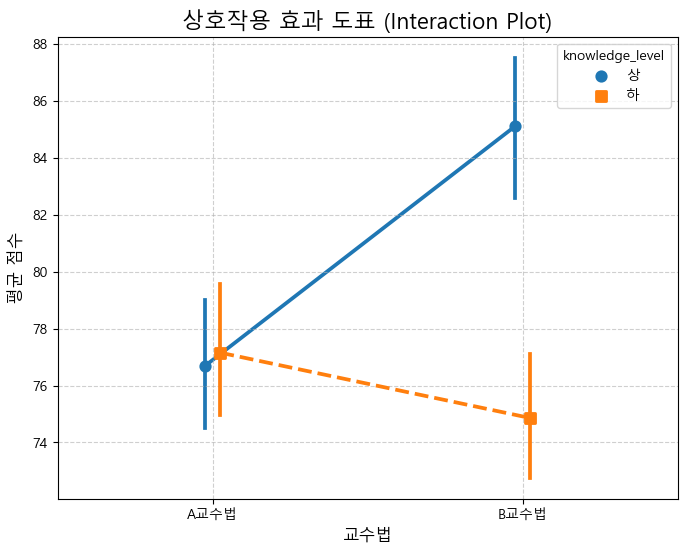

In [ ]:
# 3. 상호작용 도표 시각화
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='method', y='score', hue='knowledge_level', dodge=True,
              markers=['o', 's'], linestyles=['-', '--'])
plt.title('상호작용 효과 도표 (Interaction Plot)', fontsize=16)
plt.xlabel('교수법', fontsize=12)
plt.ylabel('평균 점수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

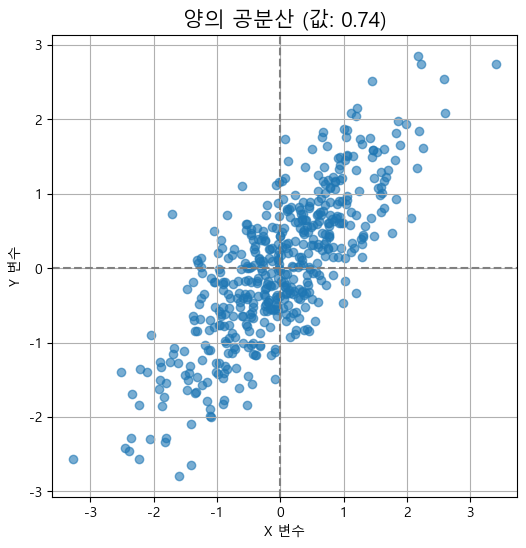

In [ ]:
# 재현성을 위해 시드 설정
np.random.seed(42)

# 양의 공분산을 갖는 데이터 생성
# 공분산 행렬에서 대각선 외의 값이 양수이면 양의 관계를 가짐
cov_matrix_pos = [[1, 0.8],  # X와 Y의 공분산을 0.8로 설정
                  [0.8, 1]]
data_pos = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix_pos, size=500)
x_pos, y_pos = data_pos[:, 0], data_pos[:, 1]

# 공분산 계산
covariance_pos = np.cov(x_pos, y_pos)[0, 1]

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(x_pos, y_pos, alpha=0.6)
plt.title(f'양의 공분산 (값: {covariance_pos:.2f})', fontsize=15)
plt.xlabel('X 변수')
plt.ylabel('Y 변수')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()

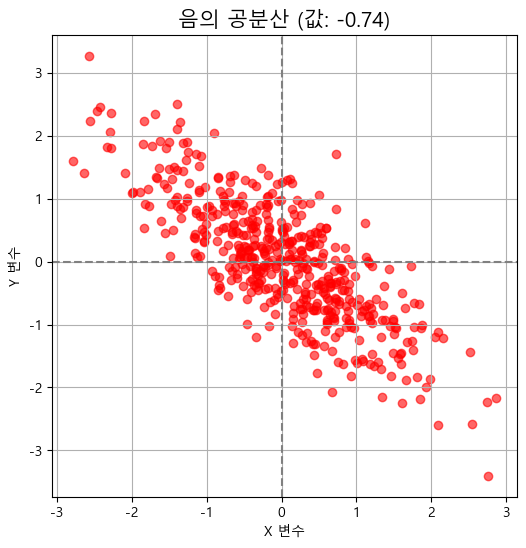

In [ ]:
np.random.seed(42)

# 음의 공분산을 갖는 데이터 생성
# 공분산 행렬에서 대각선 외의 값이 음수이면 음의 관계를 가짐
cov_matrix_neg = [[1, -0.8], # X와 Y의 공분산을 -0.8로 설정
                  [-0.8, 1]]
data_neg = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix_neg, size=500)
x_neg, y_neg = data_neg[:, 0], data_neg[:, 1]

# 공분산 계산
covariance_neg = np.cov(x_neg, y_neg)[0, 1]

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(x_neg, y_neg, alpha=0.6, color='red')
plt.title(f'음의 공분산 (값: {covariance_neg:.2f})', fontsize=15)
plt.xlabel('X 변수')
plt.ylabel('Y 변수')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()

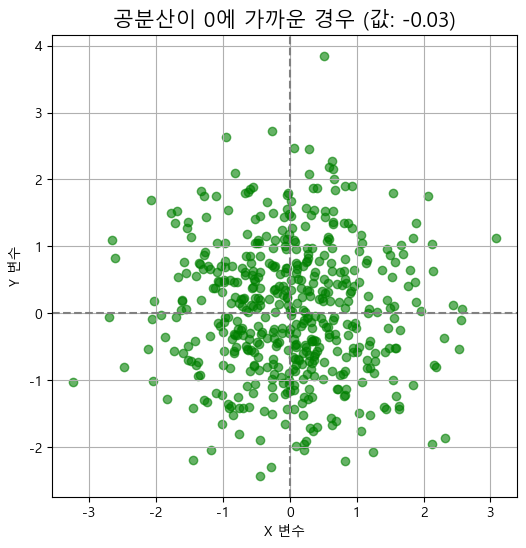

In [ ]:
np.random.seed(42)

# 공분산이 0인 데이터 생성 (두 변수가 서로 독립)
cov_matrix_zero = [[1, 0], # X와 Y의 공분산을 0으로 설정
                   [0, 1]]
data_zero = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix_zero, size=500)
x_zero, y_zero = data_zero[:, 0], data_zero[:, 1]

# 공분산 계산
covariance_zero = np.cov(x_zero, y_zero)[0, 1]

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(x_zero, y_zero, alpha=0.6, color='green')
plt.title(f'공분산이 0에 가까운 경우 (값: {covariance_zero:.2f})', fontsize=15)
plt.xlabel('X 변수')
plt.ylabel('Y 변수')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()

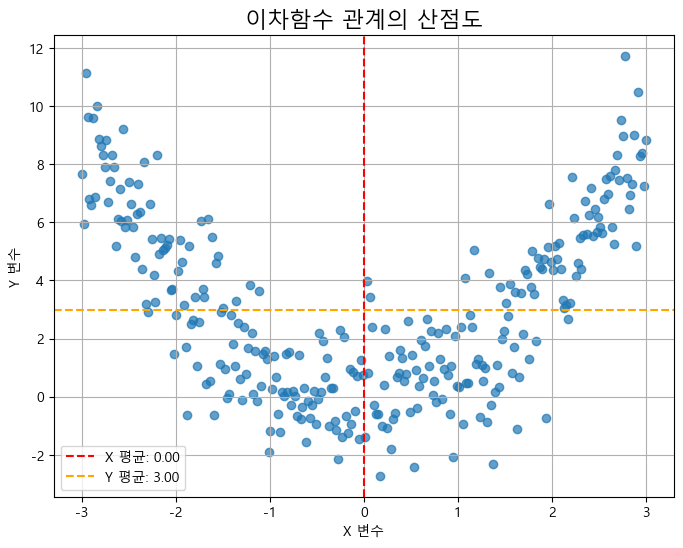

계산된 공분산: 0.0063
계산된 상관계수: 0.0012


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 생성
# -3부터 3까지 대칭적인 X 데이터 생성
x = np.linspace(-3, 3, 300)
# Y는 X의 제곱에 비례하는 U자 형태 + 약간의 노이즈
y = x**2 + np.random.normal(0, 1.5, 300)

# 2. 공분산 계산
covariance = np.cov(x, y)[0, 1]
# np.corrcoef()로 상관계수도 함께 확인
correlation = np.corrcoef(x, y)[0, 1]

# 3. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)

# 데이터의 평균선을 그려서 4분면을 시각적으로 확인
plt.axvline(x.mean(), color='red', linestyle='--', label=f'X 평균: {x.mean():.2f}')
plt.axhline(y.mean(), color='orange', linestyle='--', label=f'Y 평균: {y.mean():.2f}')

plt.title(f'이차함수 관계의 산점도', fontsize=16)
plt.xlabel('X 변수')
plt.ylabel('Y 변수')
plt.legend()
plt.grid(True)
plt.show()

print(f"계산된 공분산: {covariance:.4f}")
print(f"계산된 상관계수: {correlation:.4f}")

케이스 1: 선형 관계 (Linear Relationship)
두 변수가 뚜렷한 직선 관계를 가질 때입니다. 이 경우, 피어슨과 스피어만 계수 모두 높게 나타납니다.

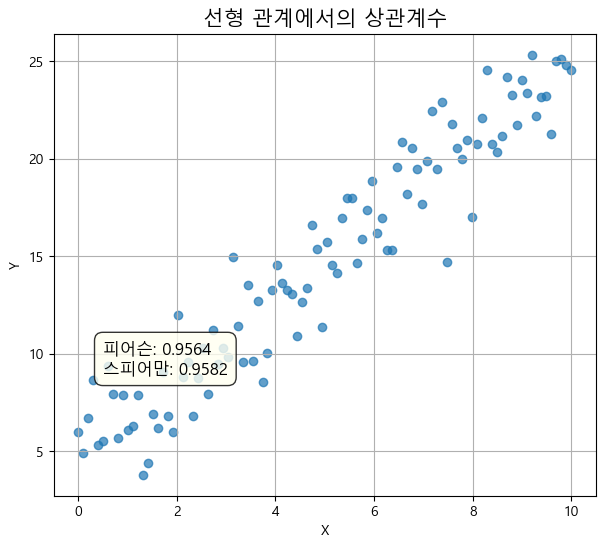

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

np.random.seed(42)

# 1. 데이터 생성 (선형 관계)
x_linear = np.linspace(0, 10, 100)
# y = 2x + 5 에 약간의 노이즈 추가
y_linear = 2 * x_linear + 5 + np.random.normal(0, 2, 100)

# 2. 상관계수 계산
pearson_coef, _ = pearsonr(x_linear, y_linear)
spearman_coef, _ = spearmanr(x_linear, y_linear)

# 3. 시각화
plt.figure(figsize=(7, 6))
plt.scatter(x_linear, y_linear, alpha=0.7)
plt.title('선형 관계에서의 상관계수', fontsize=15)
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0.5, 9, f'피어슨: {pearson_coef:.4f}\n스피어만: {spearman_coef:.4f}',
         fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='ivory', alpha=0.8))
plt.grid(True)
plt.show()

케이스 2: 단조 증가 관계 (Monotonic, Non-Linear Relationship)
관계가 직선은 아니지만, X가 증가할 때 Y도 꾸준히 증가하는 경우입니다. 대표적으로 로그 함수나 지수 함수 형태가 있습니다. 여기서 두 계수의 차이가 명확하게 드러납니다.

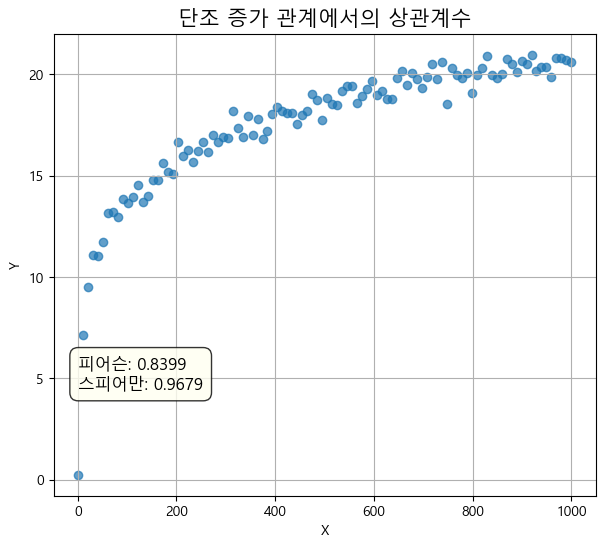

In [ ]:
np.random.seed(42)

# 1. 데이터 생성 (단조 증가하지만 비선형)
x_mono = np.linspace(1, 1000, 100)
# y = log(x) 형태에 노이즈 추가
y_mono = np.log(x_mono) * 3 + np.random.normal(0, 0.5, 100)

# 2. 상관계수 계산
pearson_coef_m, _ = pearsonr(x_mono, y_mono)
spearman_coef_m, _ = spearmanr(x_mono, y_mono)

# 3. 시각화
plt.figure(figsize=(7, 6))
plt.scatter(x_mono, y_mono, alpha=0.7)
plt.title('단조 증가 관계에서의 상관계수', fontsize=15)
plt.xlabel('X')
plt.ylabel('Y')
plt.text(1, 4.5, f'피어슨: {pearson_coef_m:.4f}\n스피어만: {spearman_coef_m:.4f}',
         fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='ivory', alpha=0.8))
plt.grid(True)
plt.show()

핵심 요약: 언제 무엇을 사용할까?
피어슨 상관계수:

두 변수 간의 관계가 선형일 것으로 기대될 때 사용합니다.

데이터가 정규성을 따르고, 이상치가 없을 때 가장 신뢰도가 높습니다.

스피어만 상관계수:

관계가 선형이 아니더라도 **꾸준히 증가하거나 감소(단조성)**하는지 보고 싶을 때 사용합니다.

데이터에 이상치가 있거나, 데이터가 순위형 자료(예: 만족도 상/중/하)일 때 매우 유용합니다.

귀무가설 (H_0): 두 변수 간에 상관관계가 없다 (피어슨: 선형 관계 없음, 스피어만: 단조 관계 없음).

대립가설 (H_1): 두 변수 간에 상관관계가 있다.

--- 피어슨 상관분석 결과 ---
상관계수(r): 0.9513
P-값(p-value): 0.0000
-> 결론: 광고비와 방문자 수 간에 유의미한 '선형' 관계가 있습니다.

--- 스피어만 상관분석 결과 ---
상관계수(rho): 0.9515
P-값(p-value): 0.0000
-> 결론: 광고비와 방문자 수 간에 유의미한 '단조' 관계가 있습니다.


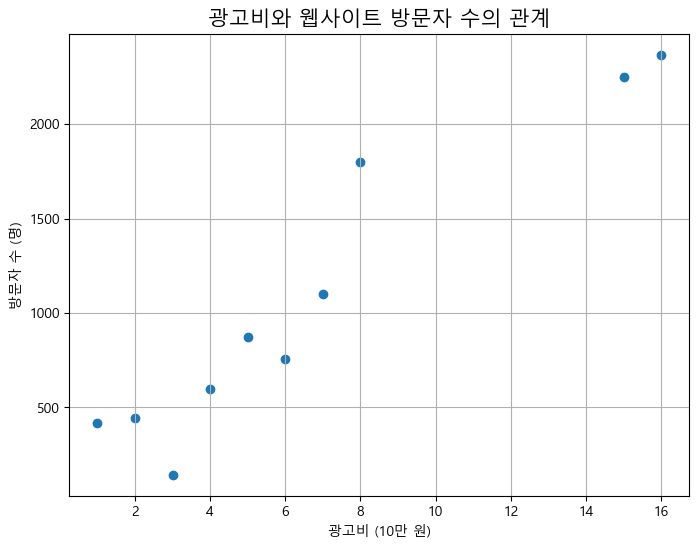

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

np.random.seed(10)

# 1. 데이터 생성
# 광고비 (10만 원 단위)
ad_costs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 15, 16]) # 15, 16은 이상치(outlier)
# 웹사이트 방문자 수 (명)
visitors = 150 * ad_costs + np.random.normal(0, 200, len(ad_costs))
visitors[7] = 1800 # 8번째 데이터에 의도적으로 노이즈 추가

# 2. 피어슨 상관분석 및 가설검정
pearson_corr, pearson_p_value = pearsonr(ad_costs, visitors)

# 3. 스피어만 상관분석 및 가설검정
spearman_corr, spearman_p_value = spearmanr(ad_costs, visitors)

# 4. 결과 출력
print("--- 피어슨 상관분석 결과 ---")
print(f"상관계수(r): {pearson_corr:.4f}")
print(f"P-값(p-value): {pearson_p_value:.4f}")

alpha = 0.05
if pearson_p_value < alpha:
    print("-> 결론: 광고비와 방문자 수 간에 유의미한 '선형' 관계가 있습니다.\n")
else:
    print("-> 결론: 유의미한 '선형' 관계의 증거를 찾지 못했습니다.\n")


print("--- 스피어만 상관분석 결과 ---")
print(f"상관계수(rho): {spearman_corr:.4f}")
print(f"P-값(p-value): {spearman_p_value:.4f}")

if spearman_p_value < alpha:
    print("-> 결론: 광고비와 방문자 수 간에 유의미한 '단조' 관계가 있습니다.")
else:
    print("-> 결론: 유의미한 '단조' 관계의 증거를 찾지 못했습니다.")


# 5. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(ad_costs, visitors)
plt.title('광고비와 웹사이트 방문자 수의 관계', fontsize=15)
plt.xlabel('광고비 (10만 원)')
plt.ylabel('방문자 수 (명)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# 한글 폰트 및 마이너스 부호 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 데이터 생성
np.random.seed(42)
X = np.linspace(5, 20, 100)
y = 10 + 4 * X + np.random.normal(0, 15, 100) # y = 10 + 4X + error
X = sm.add_constant(X) # 회귀분석을 위해 상수항(intercept) 추가

# OLS(최소자승법)를 이용한 회귀 모델 적합
fitted_model = sm.OLS(y, X).fit()

# 분석에 필요한 값들 추출
y_pred = fitted_model.predict(X) # 예측값
residuals = fitted_model.resid   # 잔차 (실제값 - 예측값)

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           1.56e-23
Time:                        11:39:55   Log-Likelihood:                -402.46
No. Observations:                 100   AIC:                             808.9
Df Residuals:                      98   BIC:                             814.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7181      4.142      1.622      0.1

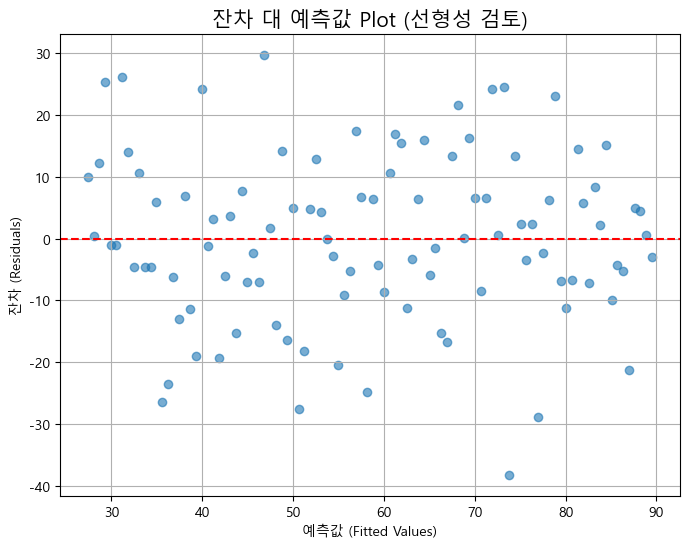

In [ ]:
# 선형성 검토: 잔차 대 예측값 Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('잔차 대 예측값 Plot (선형성 검토)', fontsize=15)
plt.xlabel('예측값 (Fitted Values)')
plt.ylabel('잔차 (Residuals)')
plt.grid(True)
plt.show()

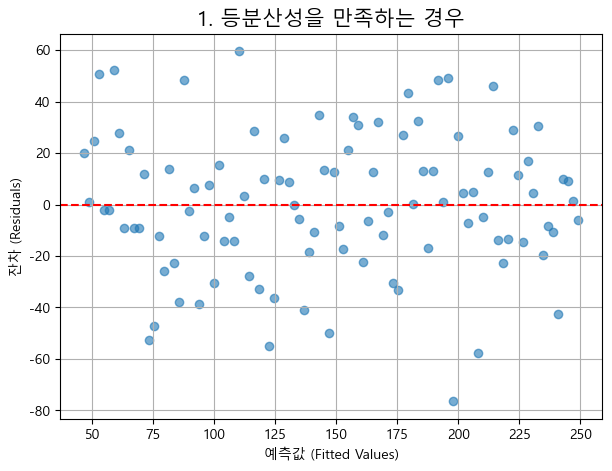

Breusch-Pagan 검정 p-value: 0.6014
-> 결론: p-값이 0.05보다 크므로 등분산성 가정을 만족합니다.


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def analyze_variance(X, y, title):
    """주어진 데이터로 회귀분석 및 등분산성 검정을 수행하는 함수"""
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    y_pred = model.predict(X_const)
    residuals = model.resid

    # 시각화: 잔차 대 예측값 Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(title, fontsize=15)
    plt.xlabel('예측값 (Fitted Values)')
    plt.ylabel('잔차 (Residuals)')
    plt.grid(True)
    plt.show()

    # 브로이슈-파간 검정
    bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
    print(f"Breusch-Pagan 검정 p-value: {bp_test[1]:.4f}")
    if bp_test[1] > 0.05:
        print("-> 결론: p-값이 0.05보다 크므로 등분산성 가정을 만족합니다.")
    else:
        print("-> 결론: p-값이 0.05보다 작므로 이분산성이 의심됩니다.")

# --- 등분산성 데이터 생성 ---
np.random.seed(42)
X1 = np.linspace(1, 100, 100)
noise1 = np.random.normal(0, 30, 100) # 분산이 일정
y1 = 50 + 2 * X1 + noise1

# 분석 실행
analyze_variance(X1, y1, '1. 등분산성을 만족하는 경우')

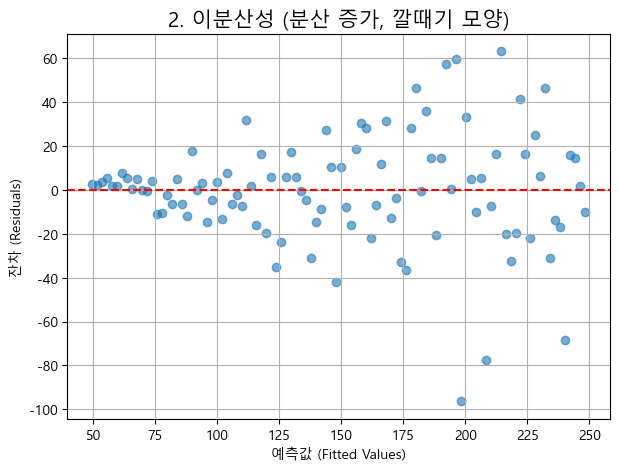

Breusch-Pagan 검정 p-value: 0.0006
-> 결론: p-값이 0.05보다 작므로 이분산성이 의심됩니다.


In [ ]:
# --- 분산 증가 데이터 생성 ---
np.random.seed(42)
X2 = np.linspace(1, 100, 100)
noise2 = X2 * np.random.normal(0, 0.5, 100) # 분산이 X에 비례하여 증가
y2 = 50 + 2 * X2 + noise2

# 분석 실행
analyze_variance(X2, y2, '2. 이분산성 (분산 증가, 깔때기 모양)')

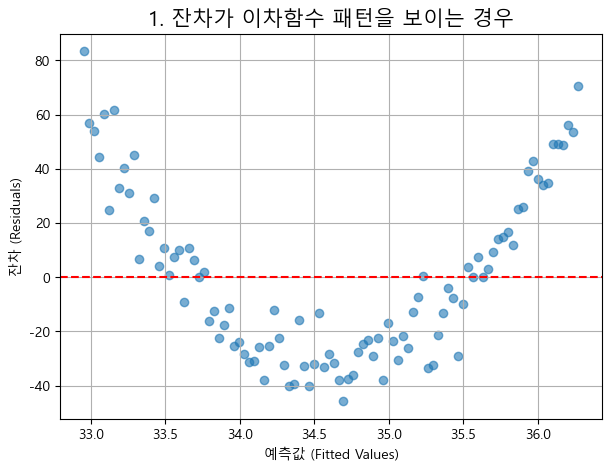

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 이전 코드에서 사용한 분석 함수 재사용
def plot_residuals(X, y, title):
    """주어진 데이터로 회귀분석 및 잔차 플롯을 그리는 함수"""
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    y_pred = model.predict(X_const)
    residuals = model.resid

    plt.figure(figsize=(7, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(title, fontsize=15)
    plt.xlabel('예측값 (Fitted Values)')
    plt.ylabel('잔차 (Residuals)')
    plt.grid(True)
    plt.show()

# --- 이차함수 관계 데이터 생성 ---
np.random.seed(1)
X1 = np.linspace(-10, 10, 100)
# 실제 관계: Y = X^2 + noise
y1 = X1**2 + np.random.normal(0, 10, 100)

# 분석 실행 (단순 선형 회귀 적용)
plot_residuals(X1, y1, '1. 잔차가 이차함수 패턴을 보이는 경우')

정규성을 만족하는 경우 (Q-Q Plot이 예쁘게 나오는 케이스)
잔차들이 정규분포를 잘 따르는 이상적인 상황입니다.

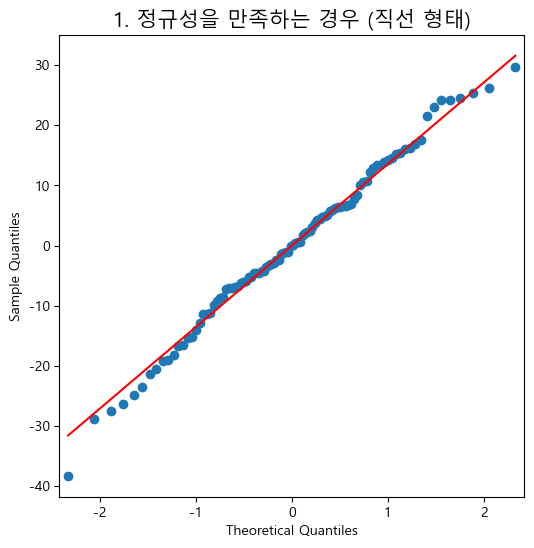

Shapiro-Wilk 검정 p-value: 0.7927
-> 결론: p-값이 0.05보다 크므로 정규성 가정을 만족합니다.


In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

def analyze_normality(X, y, title_text):
    """회귀분석 후 잔차의 정규성을 진단하는 함수"""
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    residuals = model.resid

    # Q-Q Plot 시각화
    fig, ax = plt.subplots(figsize=(6, 6))
    sm.qqplot(residuals, line='s', ax=ax) # 's'는 표준화된 라인
    ax.set_title(title_text, fontsize=15)
    plt.show()

    # 샤피로-윌크 검정
    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk 검정 p-value: {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print("-> 결론: p-값이 0.05보다 크므로 정규성 가정을 만족합니다.")
    else:
        print("-> 결론: p-값이 0.05보다 작므로 정규성 가정을 위반합니다.")

# --- 정규분포를 따르는 잔차 데이터 생성 ---
np.random.seed(42)
X1 = np.linspace(0, 100, 100)
# 오차가 정규분포를 따름
noise1 = np.random.normal(0, 15, 100)
y1 = 10 + 2 * X1 + noise1

# 분석 실행
analyze_normality(X1, y1, '1. 정규성을 만족하는 경우 (직선 형태)')

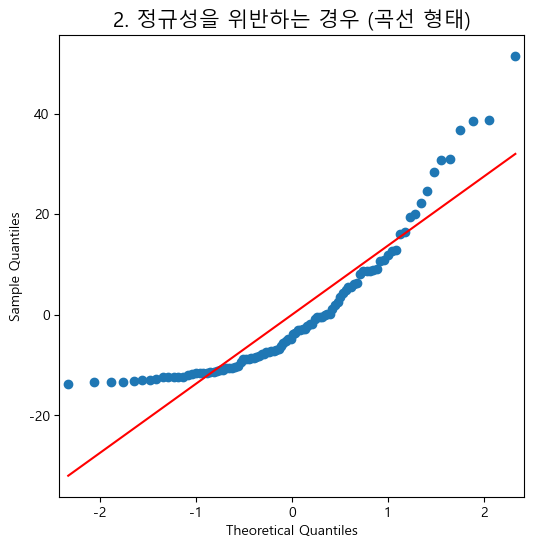

Shapiro-Wilk 검정 p-value: 0.0000
-> 결론: p-값이 0.05보다 작므로 정규성 가정을 위반합니다.


In [ ]:
# --- 정규분포를 따르지 않는 잔차 데이터 생성 ---
np.random.seed(42)
X2 = np.linspace(0, 100, 100)
# 오차가 오른쪽으로 꼬리가 긴 지수분포를 따르도록 설정
noise2 = np.random.exponential(scale=15, size=100) - 15 # 평균을 0 근처로 조정
y2 = 10 + 2 * X2 + noise2

# 분석 실행
analyze_normality(X2, y2, '2. 정규성을 위반하는 경우 (곡선 형태)')

이런 경우, 종속변수에 로그 변환을 취하거나, 이상치를 제거하거나, 일반화 선형 모델(GLM) 등 다른 종류의 회귀분석을 고려해 볼 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# 1. 데이터 불러오기
mpg = sns.load_dataset('mpg')

# 2. 데이터 전처리
# 결측치(missing value)가 있는 행 제거
mpg.dropna(inplace=True)

# 모델에 사용하지 않을 변수(자동차 이름) 제거
mpg.drop('name', axis=1, inplace=True)

# 범주형 변수('origin')를 더미 변수로 변환
origin_dummies = pd.get_dummies(mpg['origin'], prefix='origin', drop_first=True)
mpg = pd.concat([mpg, origin_dummies], axis=1)
mpg.drop('origin', axis=1, inplace=True)

# 독립변수(X)와 종속변수(y) 정의
X = mpg.drop('mpg', axis=1)
y = mpg['mpg']

# 상수항 추가
X_const = sm.add_constant(X)

In [ ]:
# 모델 학습 및 결과 요약표 출력
model = sm.OLS(y, X_const)
fitted_model = model.fit()

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.79e-139
Time:                        12:03:19   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.3246      4.602     -3.330   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# 각 변수에 대한 VIF 계산
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print("--- VIF(분산 팽창 요인) 계산 결과 ---")
print(vif.round(2))

--- VIF(분산 팽창 요인) 계산 결과 ---
   VIF Factor      features
0      117.14     cylinders
1      101.52  displacement
2       65.20    horsepower
3      141.29        weight
4       69.57  acceleration
5      119.15    model_year
6        2.30  origin_japan
7        7.15    origin_usa


다중공선성 해결 방안
VIF가 높은 변수들을 처리하는 방법은 여러 가지가 있습니다.

변수 제거: 가장 간단한 방법입니다. VIF가 높은 변수들 중 일부를 제거합니다. 보통 다른 변수들과 가장 상관관계가 높거나, 비즈니스적으로 덜 중요한 변수를 우선적으로 제거합니다.

변수 결합 (Feature Engineering): 관련된 변수들을 합쳐 새로운 파생변수를 만듭니다. 예를 들어 '마력'과 '무게'를 이용해 '무게 당 마력' 같은 새로운 변수를 만들 수 있습니다.

고급 회귀 기법 사용: 릿지(Ridge)나 라쏘(Lasso) 회귀는 다중공선성 문제에 비교적 강건하게 설계된 모델입니다.

In [ ]:
# VIF가 가장 높았던 'displacement' 변수 제거
X_reduced = X.drop('acceleration', axis=1)

# VIF 재계산
vif_reduced = pd.DataFrame()
vif_reduced["VIF Factor"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif_reduced["features"] = X_reduced.columns

print("\n--- 'displacement' 제거 후 VIF 재계산 결과 ---")
print(vif_reduced.round(2))


--- 'displacement' 제거 후 VIF 재계산 결과 ---
   VIF Factor      features
0      116.98     cylinders
1       99.14  displacement
2       47.63    horsepower
3      114.24        weight
4       51.35    model_year
5        2.30  origin_japan
6        7.14    origin_usa


In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# 데이터 준비
mpg = sns.load_dataset('mpg')
mpg.dropna(inplace=True)
mpg.drop('name', axis=1, inplace=True)
origin_dummies = pd.get_dummies(mpg['origin'], prefix='origin', drop_first=True)
mpg = pd.concat([mpg, origin_dummies], axis=1)
mpg.drop('origin', axis=1, inplace=True)

X = mpg.drop('mpg', axis=1)
y = mpg['mpg']

In [ ]:
def forward_selection(X, y, significance_level=0.05):
    """
    p-값을 이용한 전진선택법
    """
    initial_features = X.columns.tolist()
    selected_features = []

    while True:
        remaining_features = list(set(initial_features) - set(selected_features))
        new_p_value = pd.Series(index=remaining_features, dtype='float64')

        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [new_column]]))
            result = model.fit()
            new_p_value[new_column] = result.pvalues[new_column]

        min_p_value = new_p_value.min()

        if min_p_value < significance_level:
            best_feature = new_p_value.idxmin()
            selected_features.append(best_feature)
            print(f"'{best_feature}' 추가 (p-value: {min_p_value:.4f})")
        else:
            break

    return selected_features

print("--- 전진 선택법 시작 ---")
forward_selected_features = forward_selection(X, y)
print("\n최종 선택된 변수:", forward_selected_features)

# 최종 모델 확인
final_model_forward = sm.OLS(y, sm.add_constant(X[forward_selected_features])).fit()
print("\n--- 전진 선택법 최종 모델 요약 ---")
print(final_model_forward.summary())

--- 전진 선택법 시작 ---
'weight' 추가 (p-value: 0.0000)
'model_year' 추가 (p-value: 0.0000)
'origin_usa' 추가 (p-value: 0.0000)

최종 선택된 변수: ['weight', 'model_year', 'origin_usa']

--- 전진 선택법 최종 모델 요약 ---
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     585.0
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.47e-143
Time:                        12:08:13   Log-Likelihood:                -1026.2
No. Observations:                 392   AIC:                             2060.
Df Residuals:                     388   BIC:                             2076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 c

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    """
    p-값을 이용한 후진제거법
    """
    features = X.columns.tolist()

    while len(features) > 0:
        X_const = sm.add_constant(X[features])
        p_values = sm.OLS(y, X_const).fit().pvalues[1:] # 상수항 제외
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            worst_feature = p_values.idxmax()
            features.remove(worst_feature)
            print(f"'{worst_feature}' 제거 (p-value: {max_p_value:.4f})")
        else:
            break

    return features

print("\n--- 후진 제거법 시작 ---")
backward_selected_features = backward_elimination(X, y)
print("\n최종 선택된 변수:", backward_selected_features)

# 최종 모델 확인
final_model_backward = sm.OLS(y, sm.add_constant(X[backward_selected_features])).fit()
print("\n--- 후진 제거법 최종 모델 요약 ---")
print(final_model_backward.summary())


--- 후진 제거법 시작 ---
'origin_japan' 제거 (p-value: 0.6935)
'acceleration' 제거 (p-value: 0.4208)
'cylinders' 제거 (p-value: 0.1217)

최종 선택된 변수: ['displacement', 'horsepower', 'weight', 'model_year', 'origin_usa']

--- 후진 제거법 최종 모델 요약 ---
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     358.3
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.48e-142
Time:                        12:08:57   Log-Likelihood:                -1022.1
No. Observations:                 392   AIC:                             2056.
Df Residuals:                     386   BIC:                             2080.
Df Model:                           5                                         
Covariance Type:            nonrobust                      

1. ACF (Autocorrelation Function, 자기상관 함수)
ACF는 현재 시점의 데이터(y_t)와 k 시점 이전의 과거 데이터(y_t−k) 사이의 상관관계를 나타냅니다.

핵심: k 시점만큼 떨어진 데이터들끼리 얼마나 닮았는가?

특징: 이 상관관계에는 y_t와 y_t−k 사이의 모든 다른 시점(y_t−1,y_t−2,...)들의 영향이 모두 포함되어 있습니다.

2. PACF (Partial Autocorrelation Function, 편자기상관 함수)
PACF도 현재 시점의 데이터(y_t)와 k 시점 이전의 데이터(y_t−k) 사이의 상관관계를 나타내지만, 한 가지 큰 차이가 있습니다.

핵심: 중간에 있는 모든 데이터(y_t−1,y_t−2,...)들의 영향을 제거한 후의 순수한 상관관계를 측정합니다.

비유: A와 C의 관계를 알고 싶은데, 중간에 B가 끼어서 영향을 주고 있다면, B의 영향을 싹 제거하고 A와 C 둘만의 진짜 관계를 보는 것과 같습니다.

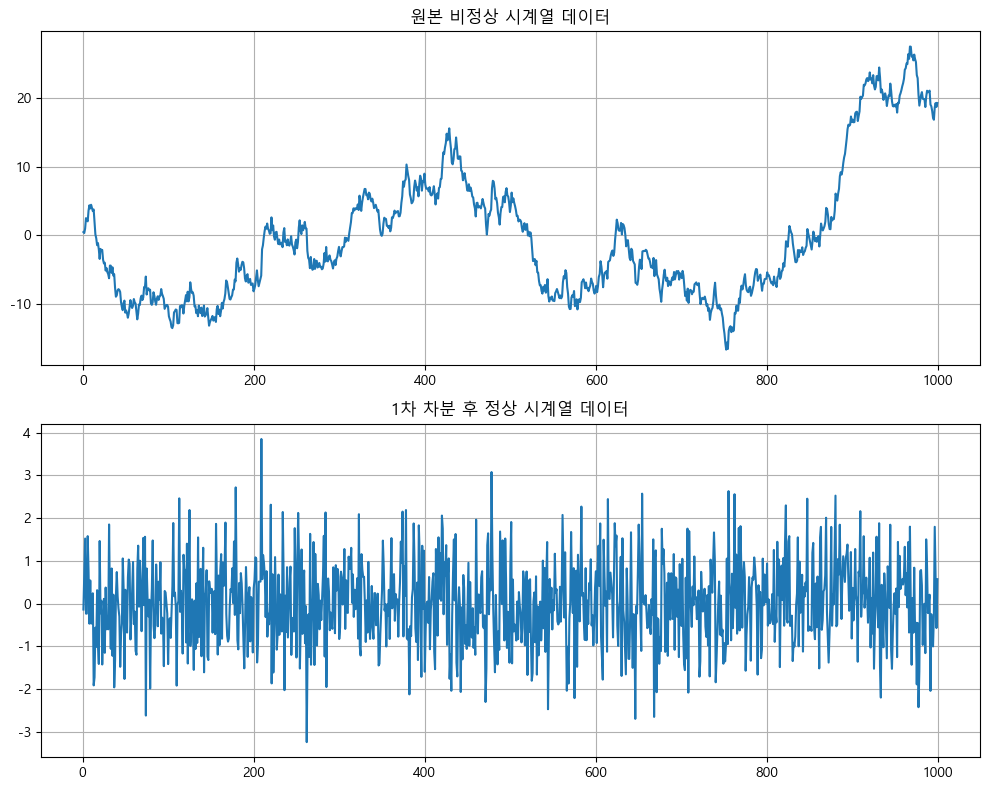

c:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


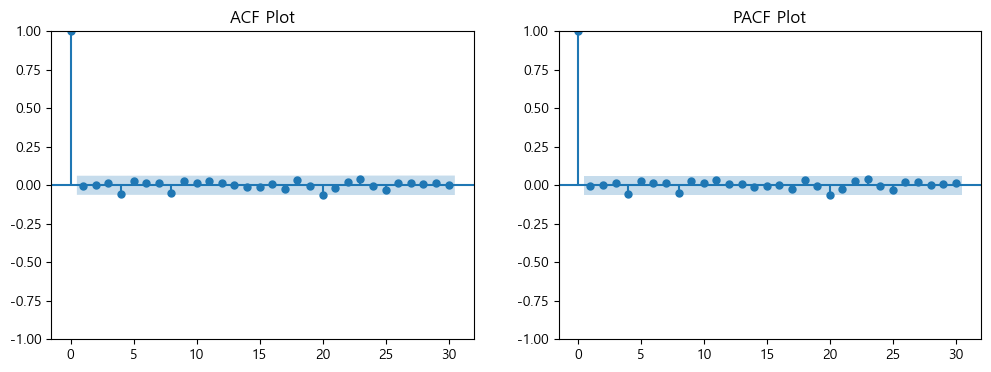

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. 재현 가능한 결과를 위해 시드 설정
np.random.seed(42)

# 2. 비정상 시계열 데이터 생성 (Random Walk)
# 정규분포를 따르는 1000개의 랜덤 데이터를 생성하고, .cumsum()으로 누적 합계를 구해 추세를 만듭니다.
ts_non_stationary = pd.Series(np.random.randn(1000).cumsum(), name='Original Random Walk')

# 3. 1차 차분을 통해 정상 시계열로 변환
# .diff()는 현재 값에서 이전 값을 빼주는 차분 함수입니다.
# 차분 후 첫 번째 값은 NaN이 되므로 .dropna()로 제거합니다.
ts_stationary = ts_non_stationary.diff().dropna()
ts_stationary.name = 'Differenced Series'


# -------------------- 시각화 --------------------

# 4. 원본 데이터와 차분된 데이터 비교 시각화
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

ts_non_stationary.plot(ax=axes[0], title='원본 비정상 시계열 데이터')
axes[0].grid(True)

ts_stationary.plot(ax=axes[1], title='1차 차분 후 정상 시계열 데이터')
axes[1].grid(True)

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()


# 5. 최종 정상 시계열 데이터의 ACF와 PACF 플롯 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(ts_stationary, ax=axes[0])
axes[0].set_title('ACF Plot')

plot_pacf(ts_stationary, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.show()

1. 단순 이동평균법 (Simple Moving Average)
이동평균법은 특정 기간(window) 동안의 데이터 평균을 계산하여, 그 평균값으로 다음 시점을 예측하는 방법입니다. 데이터의 무작위적인 변동(noise)을 줄여 전체적인 추세를 파악하기 쉽게 해줍니다.

핵심: 과거 k 기간의 데이터를 모두 동일한 가중치로 평균 낸다.

예시: '5일 이동평균 주가'는 최근 5일간의 주가를 평균 낸 값입니다.

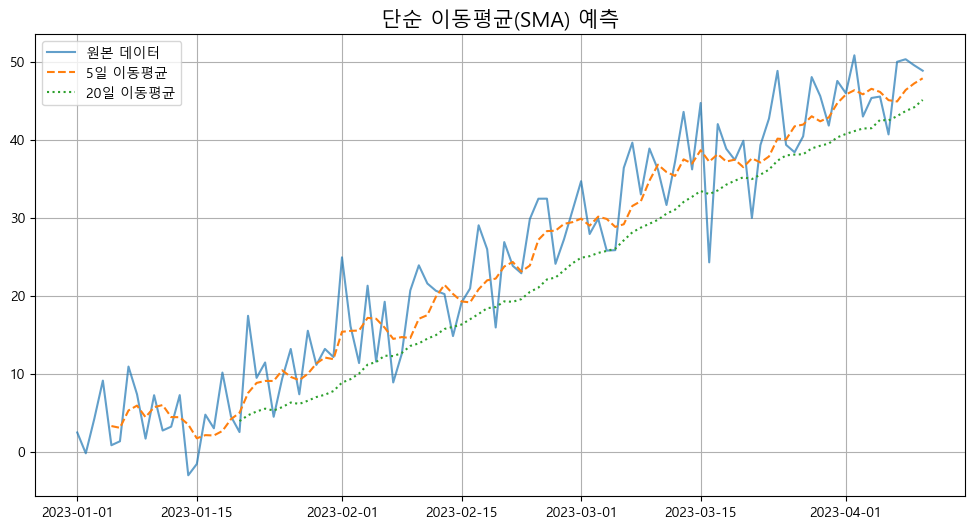

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 샘플 데이터 생성 (추세 + 노이즈)
np.random.seed(42)
n_points = 100
# y = 0.5x + noise 형태의 데이터
ts_data = pd.Series(
    np.linspace(0, 50, n_points) + np.random.normal(0, 5, n_points),
    index=pd.date_range(start='2023-01-01', periods=n_points)
)

# 2. 이동평균 계산
# window=5: 최근 5개 데이터의 평균 (5일 이동평균)
moving_avg_5 = ts_data.rolling(window=5).mean()
# window=20: 최근 20개 데이터의 평균 (20일 이동평균)
moving_avg_20 = ts_data.rolling(window=20).mean()

# 3. 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='원본 데이터', alpha=0.7)
plt.plot(moving_avg_5, label='5일 이동평균', linestyle='--')
plt.plot(moving_avg_20, label='20일 이동평균', linestyle=':')
plt.title('단순 이동평균(SMA) 예측', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

2. 단순 지수평활법 (Simple Exponential Smoothing)
지수평활법은 이동평균법과 유사하지만, 과거의 모든 데이터를 사용하되 최근 데이터에 더 높은 가중치를 부여하여 평균을 계산합니다. 가중치는 시간의 흐름에 따라 지수적으로(exponentially) 감소합니다.

핵심: 최근 데이터일수록 더 중요하다는 철학에 기반하며, 가중치의 크기는 **alpha(
alpha)**라는 평활계수(smoothing factor)로 조절합니다.

alpha
approx1: 최근 데이터에 매우 큰 가중치를 둠 (변화에 민감하게 반응).

alpha
approx0: 과거 데이터에 큰 가중치를 둠 (매우 부드럽게 반응).

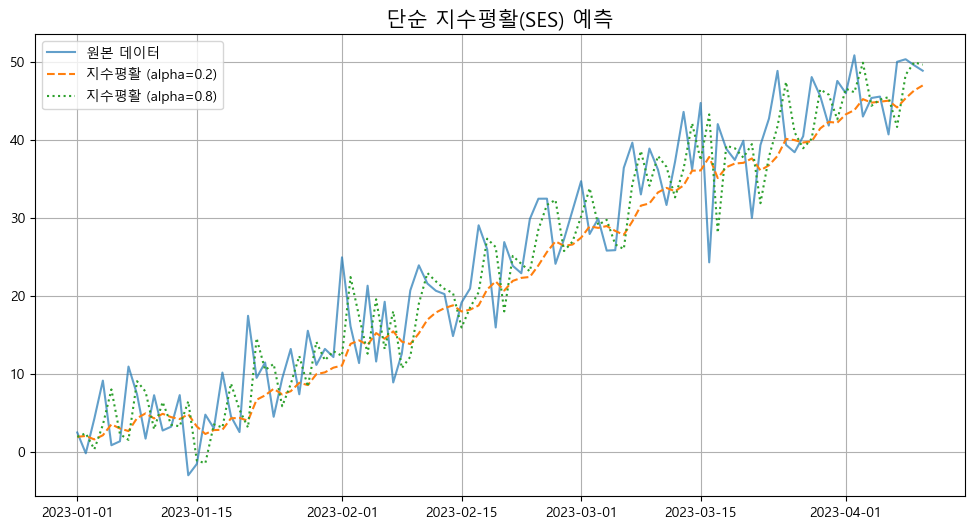

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

# 1. 단순 지수평활 모델 학습 및 예측
# alpha=0.2: 과거 데이터를 많이 반영 (부드러운 예측)
model_alpha_low = SimpleExpSmoothing(ts_data, initialization_method="estimated").fit(smoothing_level=0.2, optimized=False)
forecast_low = model_alpha_low.fittedvalues

# alpha=0.8: 최근 데이터를 많이 반영 (민감한 예측)
model_alpha_high = SimpleExpSmoothing(ts_data, initialization_method="estimated").fit(smoothing_level=0.8, optimized=False)
forecast_high = model_alpha_high.fittedvalues

# 2. 시각화
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='원본 데이터', alpha=0.7)
plt.plot(forecast_low, label='지수평활 (alpha=0.2)', linestyle='--')
plt.plot(forecast_high, label='지수평활 (alpha=0.8)', linestyle=':')
plt.title('단순 지수평활(SES) 예측', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

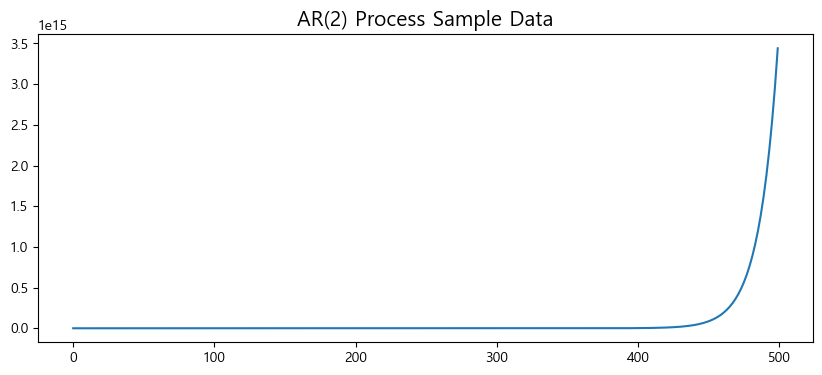

c:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


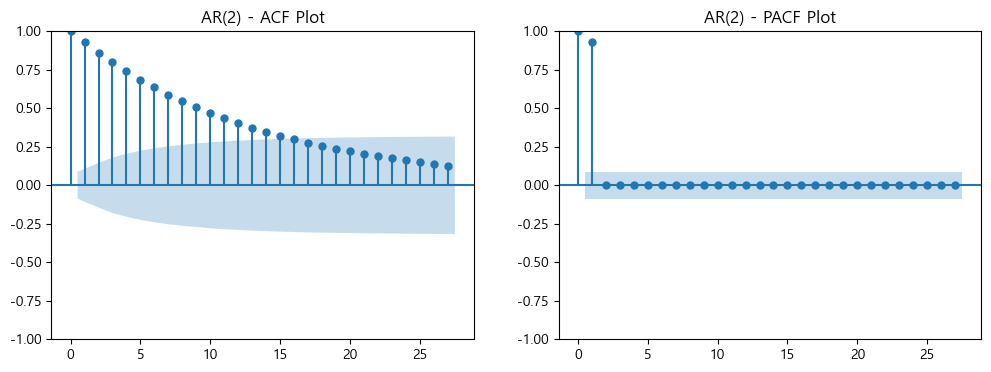

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. AR(2) 모델 정의 및 데이터 생성
np.random.seed(42)
# AR 계수 설정. [1, -phi_1, -phi_2, ...]. y_t = 0.8*y_{t-1} + 0.3*y_{t-2} + e_t
ar_params = np.array([1, -0.8, -0.3])
ma_params = np.array([1]) # MA 부분은 없음

ar_process = ArmaProcess(ar_params, ma_params)
ar_data = ar_process.generate_sample(nsample=500)

# 2. 데이터 및 ACF, PACF 플롯 시각화
plt.figure(figsize=(10, 4))
plt.plot(ar_data)
plt.title('AR(2) Process Sample Data', fontsize=15)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ar_data, ax=axes[0])
axes[0].set_title('AR(2) - ACF Plot')
plot_pacf(ar_data, ax=axes[1])
axes[1].set_title('AR(2) - PACF Plot')
plt.show()

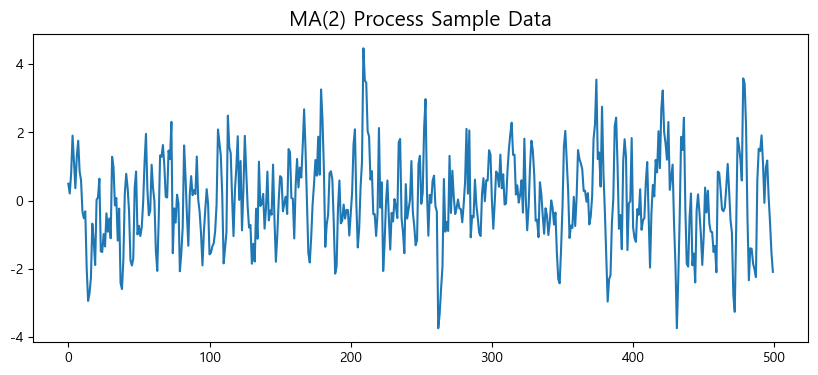

c:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


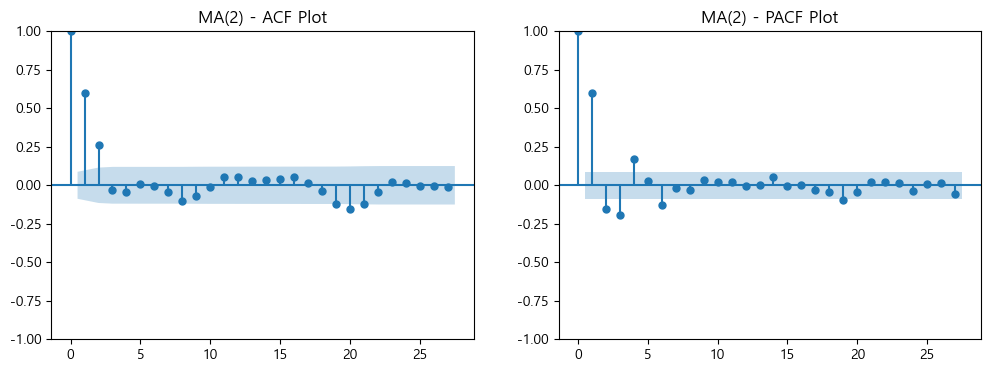

In [ ]:
# 1. MA(2) 모델 정의 및 데이터 생성
np.random.seed(42)
# MA 계수 설정. [1, theta_1, theta_2, ...]. y_t = e_t + 0.7*e_{t-1} + 0.5*e_{t-2}
ar_params2 = np.array([1]) # AR 부분은 없음
ma_params2 = np.array([1, 0.7, 0.5])

ma_process = ArmaProcess(ar_params2, ma_params2)
ma_data = ma_process.generate_sample(nsample=500)

# 2. 데이터 및 ACF, PACF 플롯 시각화
plt.figure(figsize=(10, 4))
plt.plot(ma_data)
plt.title('MA(2) Process Sample Data', fontsize=15)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ma_data, ax=axes[0])
axes[0].set_title('MA(2) - ACF Plot')
plot_pacf(ma_data, ax=axes[1])
axes[1].set_title('MA(2) - PACF Plot')
plt.show()

c:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


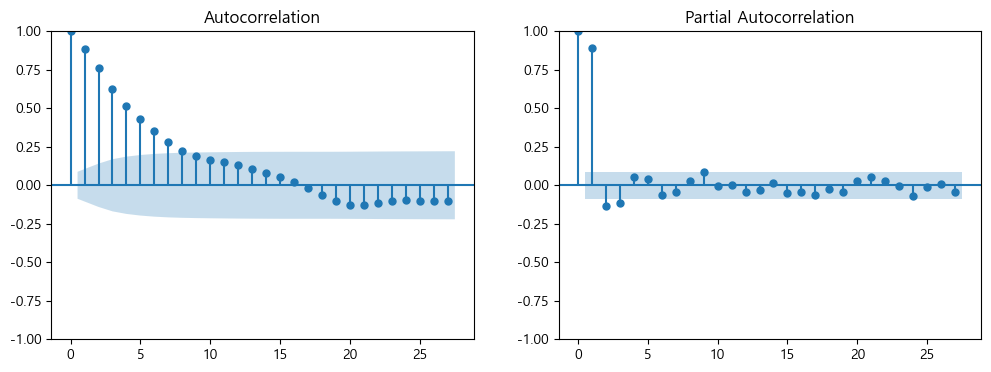

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. ARMA(2, 2) 데이터 생성
np.random.seed(42)
# AR 계수와 MA 계수를 모두 정의
ar_params = np.array([1, -0.5, -0.3]) # AR(2)
ma_params = np.array([1, 0.5, 0.2])  # MA(2)

arma_process = ArmaProcess(ar_params, ma_params)
arma_data = pd.Series(arma_process.generate_sample(nsample=500))

# 2. ACF 및 PACF 플롯 확인
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(arma_data, ax=axes[0])
plot_pacf(arma_data, ax=axes[1])
plt.show()

In [ ]:
# 3. ARMA(2, 2) 모델 적합
# ARIMA(p, d, q)에서 d=0으로 설정하면 ARMA(p, q) 모델이 됩니다.
model = ARIMA(arma_data, order=(2, 0, 2))
fitted_model = model.fit()

# 모델 적합 결과 요약 출력
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -698.918
Date:                Sun, 10 Aug 2025   AIC                           1409.836
Time:                        13:00:26   BIC                           1435.124
Sample:                             0   HQIC                          1419.759
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0668      0.322      0.208      0.836      -0.564       0.698
ar.L1          0.8032      0.273      2.947      0.003       0.269       1.337
ar.L2          0.0069      0.239      0.029      0.9

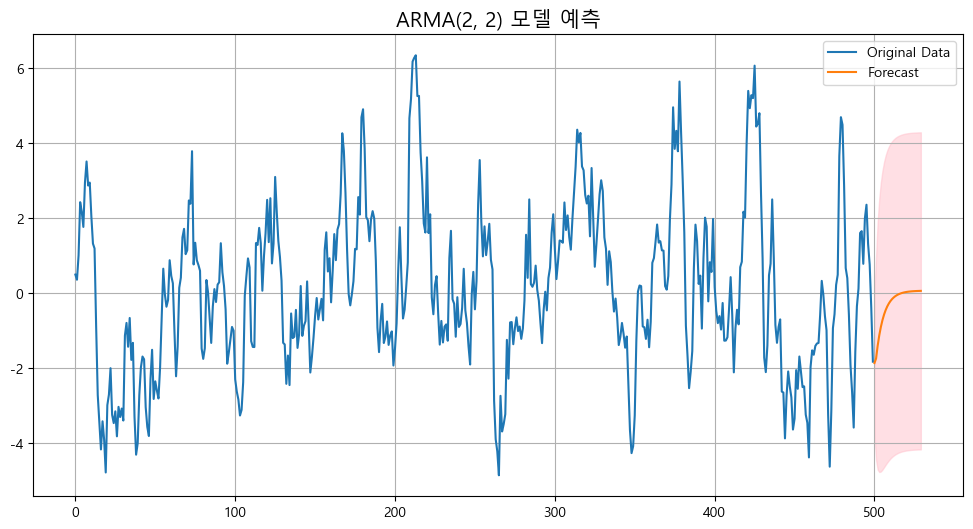

In [ ]:
# 4. 미래 예측
forecast = fitted_model.get_forecast(steps=30)
# 예측값, 신뢰구간 하한, 신뢰구간 상한 추출
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 5. 시각화
plt.figure(figsize=(12, 6))
# 원본 데이터 플롯
plt.plot(arma_data, label='Original Data')
# 예측값 플롯
plt.plot(predicted_mean, label='Forecast')
# 신뢰구간 플롯
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.5)

plt.title('ARMA(2, 2) 모델 예측', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

다차원척도법(MDS)이란?
다차원척도법은 여러 개체들 간의 거리(dissimilarity) 정보를 바탕으로, 이들을 저차원 공간(보통 2차원 또는 3차원)의 지도 위에 점으로 표현하는 분석 방법입니다.

핵심 아이디어: 원래 데이터에서 거리가 멀었던 개체는 지도 위에서도 멀리, 거리가 가까웠던 개체는 지도 위에서도 가깝게 배치하여 개체들 간의 상대적인 관계를 시각적으로 파악하는 데 목적이 있습니다.

대표적인 비유: 여러 도시들 간의 거리표만 가지고 실제 지도를 복원하는 것과 같습니다. 예를 들어 "서울-부산 간 거리"와 "서울-인천 간 거리"를 알면, 지도 위에서 서울을 기준으로 인천은 가깝게, 부산은 멀리 위치시켜 전체적인 지도를 그려낼 수 있습니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 1. 도시 이름과 거리 데이터 정의
cities = ['서울', '부산', '대구', '인천', '광주', '대전', '울산']
# 도시 간 가상 거리 (비유사성 행렬)
# 행렬은 대칭이며, 대각선은 0 (자기 자신과의 거리)
distance_matrix = np.array([
    [0, 325, 237, 29, 268, 140, 307],  # 서울로부터의 거리
    [325, 0, 88, 354, 172, 195, 45],   # 부산으로부터의 거리
    [237, 88, 0, 266, 117, 107, 53],   # 대구로부터의 거리
    [29, 354, 266, 0, 297, 149, 336],  # 인천으로부터의 거리
    [268, 172, 117, 297, 0, 119, 194], # 광주로부터의 거리
    [140, 195, 107, 149, 119, 0, 175],  # 대전으로부터의 거리
    [307, 45, 53, 336, 194, 175, 0]    # 울산으로부터의 거리
])

# 보기 쉽게 DataFrame으로도 확인
dist_df = pd.DataFrame(distance_matrix, index=cities, columns=cities)
print("--- 도시 간 거리 행렬 ---")
print(dist_df)

--- 도시 간 거리 행렬 ---
     서울   부산   대구   인천   광주   대전   울산
서울    0  325  237   29  268  140  307
부산  325    0   88  354  172  195   45
대구  237   88    0  266  117  107   53
인천   29  354  266    0  297  149  336
광주  268  172  117  297    0  119  194
대전  140  195  107  149  119    0  175
울산  307   45   53  336  194  175    0


In [ ]:
# 2. MDS 모델 생성 및 학습
# n_components=2: 2차원 공간으로 축소
# dissimilarity='precomputed': 입력 데이터가 이미 계산된 거리 행렬임을 명시
# random_state: 재현 가능한 결과를 위한 시드 설정
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# 거리 행렬을 학습하여 2차원 좌표를 얻음
city_coords = mds.fit_transform(distance_matrix)

print("\n--- MDS로 변환된 2차원 좌표 ---")
print(city_coords)


--- MDS로 변환된 2차원 좌표 ---
[[-9.80163202e+01 -1.42949121e+02]
 [ 4.61345660e+01  1.50332801e+02]
 [ 1.99730768e+01  6.80799567e+01]
 [-1.02427853e+02 -1.71030802e+02]
 [ 1.26303738e+02 -1.11554484e-01]
 [ 2.65176892e+00 -4.21219457e+01]
 [ 5.38102336e+00  1.37800666e+02]]


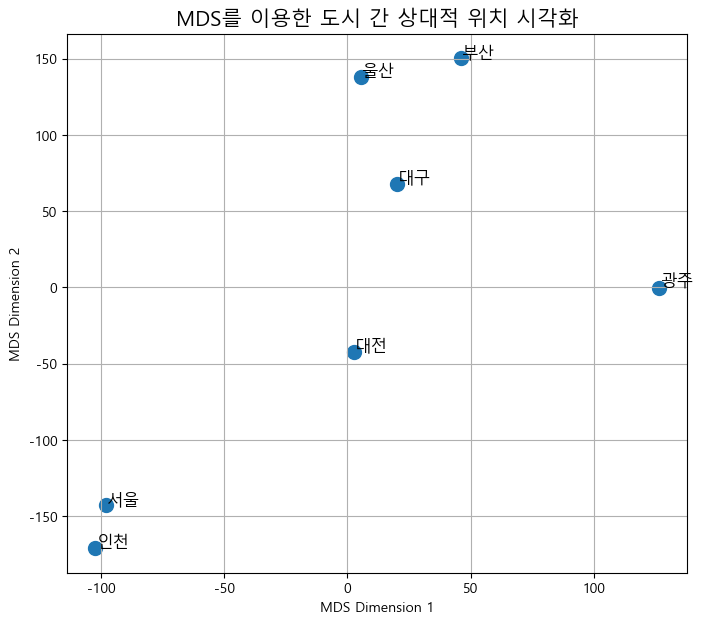

In [ ]:
# 3. 시각화
plt.figure(figsize=(8, 7))
plt.scatter(city_coords[:, 0], city_coords[:, 1], s=100) # s는 점의 크기

# 각 점에 도시 이름 텍스트 추가
for i, city in enumerate(cities):
    plt.text(city_coords[i, 0] + 0.5, city_coords[i, 1] + 0.5, city, fontsize=12)

plt.title('MDS를 이용한 도시 간 상대적 위치 시각화', fontsize=15)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.datasets import load_digits

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 64차원의 손글씨 숫자 데이터 불러오기
digits = load_digits()
X = digits.data  # 데이터 (각 행이 64차원의 특성 벡터)
y = digits.target # 레이블 (0~9 숫자)

print(f"데이터 형태 (샘플 수, 특성 수): {X.shape}")

데이터 형태 (샘플 수, 특성 수): (1797, 64)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

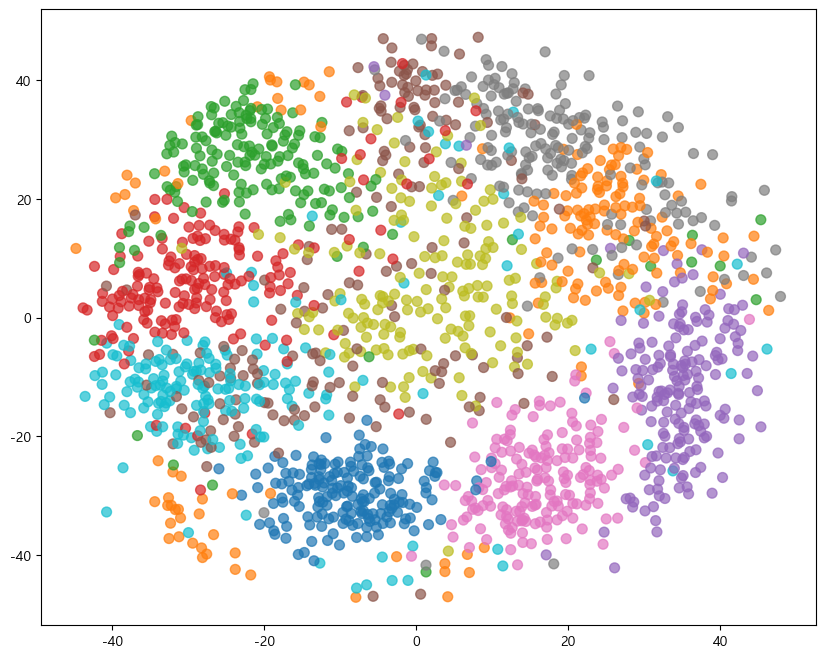

In [ ]:
# 2. MDS 모델 생성 및 학습
# n_components=2: 2차원 공간으로 축소
# 이번에는 거리 행렬이 아닌 특성 데이터를 직접 입력하므로 dissimilarity 파라미터를 사용하지 않음
mds = MDS(n_components=2, random_state=42)

# 데이터를 학습하여 2차원 좌표를 얻음
coords_2d = mds.fit_transform(X)

# 3. 시각화
plt.figure(figsize=(10, 8))
# 각 숫자에 다른 색상을 부여하여 산점도 그리기
scatter = plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c=y, cmap='tab10', s=50, alpha=0.7)

# 범례(Legend) 추가
plt.legend(handles=scatter.legend_elements()[0], labels=digits.target_names, title="Digits")

plt.title('MDS를 이용한 64차원 손글씨 숫자 데이터 시각화', fontsize=15)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

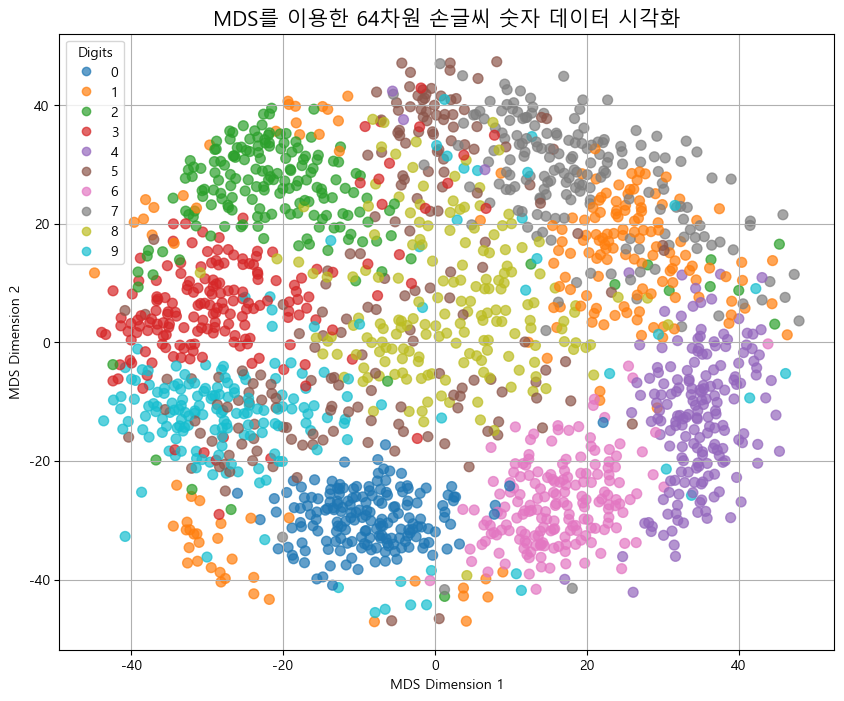

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.datasets import load_digits

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 64차원의 손글씨 숫자 데이터 불러오기
digits = load_digits()
X = digits.data
y = digits.target

# 2. MDS 모델 생성 및 학습
mds = MDS(n_components=2, random_state=42)
coords_2d = mds.fit_transform(X)

# 3. 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c=y, cmap='tab10', s=50, alpha=0.7)

# 숫자로 된 라벨을 리스트 컴프리헨션을 이용해 문자열로 변환합니다.
plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in digits.target_names], title="Digits")

plt.title('MDS를 이용한 64차원 손글씨 숫자 데이터 시각화', fontsize=15)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()